In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# read in the data
csv_file = "online_news_popularity.csv"
raw_data = pd.read_csv(csv_file)

In [10]:
raw_data

url   timedelta  \
0      http://mashable.com/2013/01/07/amazon-instant-...       731.0   
1      http://mashable.com/2013/01/07/ap-samsung-spon...       731.0   
2      http://mashable.com/2013/01/07/apple-40-billio...       731.0   
3      http://mashable.com/2013/01/07/astronaut-notre...       731.0   
4       http://mashable.com/2013/01/07/att-u-verse-apps/       731.0   
5       http://mashable.com/2013/01/07/beewi-smart-toys/       731.0   
6      http://mashable.com/2013/01/07/bodymedia-armba...       731.0   
7       http://mashable.com/2013/01/07/canon-poweshot-n/       731.0   
8      http://mashable.com/2013/01/07/car-of-the-futu...       731.0   
9      http://mashable.com/2013/01/07/chuck-hagel-web...       731.0   
10     http://mashable.com/2013/01/07/cosmic-events-d...       731.0   
11      http://mashable.com/2013/01/07/crayon-creatures/       731.0   
12         http://mashable.com/2013/01/07/creature-cups/       731.0   
13             http://mashable.com/2013/01/07/dad-jokes/       731.0   
14     http://mashable.com/2013/01/07/downton-abbey-t...       731.0   
15     http://mashable.com/2013/01/07/earth-size-plan...       731.0   
16             http://mashable.com/2013/01/07/echo-game/       731.0   
17     http://mashable.com/2013/01/07/entrepreneur-tr...       731.0   
18     http://mashable.com/2013/01/07/facebook-sick-app/       731.0   
19     http://mashable.com/2013/01/07/felt-audio-puls...       731.0   
20          http://mashable.com/2013/01/07/ford-glympse/       731.0   
21      http://mashable.com/2013/01/07/ftc-google-leaks/       731.0   
22     http://mashable.com/2013/01/07/fujifilm-50x-su...       731.0   
23     http://mashable.com/2013/01/07/hillary-clinton...       731.0   
24                http://mashable.com/2013/01/07/htc-q1/       731.0   
25     http://mashable.com/2013/01/07/huawei-ascend-m...       731.0   
26     http://mashable.com/2013/01/07/iheartradio-app...       731.0   
27     http://mashable.com/2013/01/07/intel-awesome-l...       731.0   
28     http://mashable.com/2013/01/07/isp02-iphone-ta...       731.0   
29        http://mashable.com/2013/01/07/jobs-contently/       731.0   
...                                                  ...         ...   
39614  http://mashable.com/2014/12/26/the-interview-i...         9.0   
39615  http://mashable.com/2014/12/26/toothpaste-fluo...         9.0   
39616  http://mashable.com/2014/12/26/top-photography...         9.0   
39617  http://mashable.com/2014/12/26/tor-attacked-li...         9.0   
39618  http://mashable.com/2014/12/26/tsa-gift-wrap-r...         9.0   
39619  http://mashable.com/2014/12/26/tsunami-10-year...         9.0   
39620  http://mashable.com/2014/12/26/turkey-teen-ins...         9.0   
39621  http://mashable.com/2014/12/26/ukraine-prisone...         9.0   
39622  http://mashable.com/2014/12/26/wacky-kickstart...         9.0   
39623        http://mashable.com/2014/12/26/what-is-tor/         9.0   
39624  http://mashable.com/2014/12/27/air-asia-flight...         9.0   
39625  http://mashable.com/2014/12/27/als-ice-bucket-...         9.0   
39626  http://mashable.com/2014/12/27/christmas-tree-...         9.0   
39627  http://mashable.com/2014/12/27/extremist-leade...         9.0   
39628  http://mashable.com/2014/12/27/facebook-year-i...         9.0   
39629  http://mashable.com/2014/12/27/frozen-doll-prank/         9.0   
39630  http://mashable.com/2014/12/27/high-school-i-c...         9.0   
39631  http://mashable.com/2014/12/27/japan-elderly-d...         9.0   
39632  http://mashable.com/2014/12/27/las-vegas-new-y...         9.0   
39633  http://mashable.com/2014/12/27/lbj-adviser-sla...         9.0   
39634  http://mashable.com/2014/12/27/music-grid-outf...         9.0   
39635   http://mashable.com/2014/12/27/nike-marc-newson/         9.0   
39636  http://mashable.com/2014/12/27/north-korea-int...         8.0   
39637  http://mashable.com/2014/12/27/nypd-rafael-ram...         8.0   
39638  http://mashabl

In [5]:
raw_data.shape

(39644, 61)

We will use the solution given by
$$
    (X^TX + \lambda I) \beta = X^Ty 
$$
$$
    \beta = (X^TX + \lambda I)^{-1}X^Ty.
$$
Also, note that 
$$
    y = \beta x
$$

In [11]:
# drop the url because it is only a label. Notice that we are
# predicting shares, so we drop that too
X = raw_data.drop([" shares", "url"], 1)

# insert the bias term as the first column
lambda_bias = np.ones(X.shape[0])
X.insert(0 , " bias", lambda_bias)
## Find the log value of shares
y = raw_data[" shares"]
y = np.asarray(y)
log_y = np.log(y)

## convert to np arrays
X = np.asarray(X)

In [12]:
print(X.shape)
print(y.shape)
y = y.reshape(-1,1)
print(y.shape)

(39644, 60)
(39644,)
(39644, 1)


In [13]:
# Create test and validation sets
# 2/3 training
# 1/3 test ---
#     (1/2) validation set
#     (1/2) test set
trainSplit = int(2*X.shape[0]/3)
testSplit = int(1*X.shape[0]/6)

train_X = X[:trainSplit]
train_y = y[:trainSplit]
train_log_y = log_y[:trainSplit]

valid_X = X[trainSplit-1: trainSplit+testSplit]
valid_y = y[trainSplit-1: trainSplit+testSplit]
valid_log_y = log_y[trainSplit-1:trainSplit+testSplit]

test_X = X[trainSplit+testSplit:]
test_y = y[trainSplit+testSplit:]
test_log_y = log_y[trainSplit+testSplit:]


Weights
$$ \beta = (X^TX + \alpha I)^{-1}X^Ty. $$
Root Mean Square Error
$$ \sqrt{\sum_i^N \frac{(y - \hat{y})^2}{N}}$$

In [18]:
# Create our algorithm, start with the identity matrix.
# don't regularize the identity matrix, so remove the first index
I = np.identity(train_X.shape[1])
I[0,0]=0
alpha_RMSE = []
beta_vals = []

for i in [i for i in np.linspace(start=0,stop=150,num=3*150)]:
    alpha = i
    beta = np.linalg.inv(train_X.T @ train_X + alpha * I) @ train_X.T @ train_log_y
    
    beta_vals.append(np.sqrt(beta @ beta))
    
    # RMSE for validation set
    predicted= valid_X @ beta
    true_val = valid_log_y
    mse_val = np.square(true_val - predicted)
    rmse_val = np.sqrt(np.sum(mse_val) / valid_X.shape[0])
    
    # RMSE for test set
    true_test = test_log_y
    mse_test = np.square(true_test - predicted)
    rmse_test = np.sqrt(np.sum(mse_test) / valid_X.shape[0])
    
    alpha_RMSE.append((alpha, rmse_val, rmse_test))


In [19]:
alpha_vals = []
rmse_vals = []
rmse_tests = []
for alpha, rmse_val, rmse_test in alpha_RMSE:
    alpha_vals.append(alpha)
    rmse_vals.append(rmse_val)
    rmse_tests.append(rmse_test)

min_val = min(rmse_vals)
min_test = min(rmse_tests)
ind = rmse_vals.index(min(rmse_vals))
print("The optimized regularizing constant is alpha =", alpha_vals[ind])
print("The root mean square error for the validation set is  =", min_val)
print("The root mean square error for the test set is  =", min_test)


The optimized regularizing constant is alpha = 8.6859688196
The root mean square error for the validation set is  = 0.833981237414
The root mean square error for the test set is  = 0.981052179431


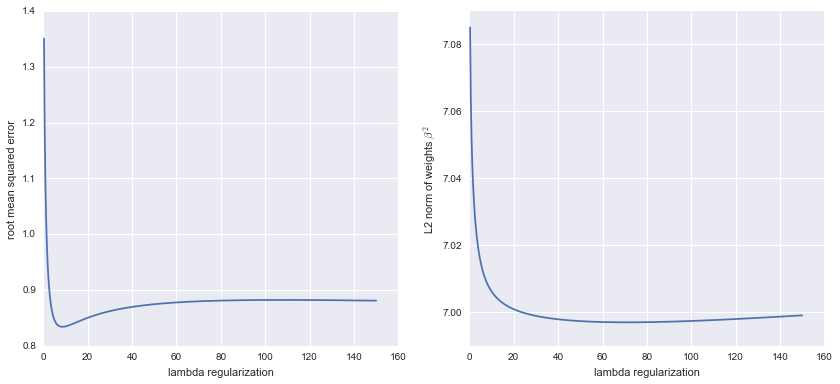

In [7]:
plt.figure(figsize=(14,6))

plt.title("Linear scale without the first term")
plt.subplot(1,2,1)
plt.plot(alpha_vals[1:], rmse_vals[1:])
plt.xlabel('lambda regularization')
plt.ylabel('root mean squared error')

plt.subplot(1,2,2)
plt.plot(alpha_vals[1:], beta_vals[1:])
plt.xlabel('lambda regularization')
plt.ylabel('L2 norm of weights $ \\beta^2 $')

plt.savefig("graphs")

In [20]:
# Using the solution's implementation
def linreg(X, y, reg=0.0):
    eye = np.eye(X.shape[1])
    eye[0,0] = 0
    return np.linalg.solve(
        X.T @ X + reg * eye,
        X.T @ y
    )

$$ 
x* = \left[A^T \left(I - \frac{1}{n}1 1^T \right)A + \alpha I \right]^{-1} A^T \left(I -\frac{1}{n}11^T \right)y
$$

In [21]:
# remove the first term b from the weights
train_X_no_b = train_X[:,1:]
valid_X_no_b = valid_X[:,1:]

# count the number of columns
features = train_X_no_b.shape[1]
lammy = alpha_vals[ind] # previous lambda value
n = train_X_no_b.shape[0] # number of samples

inside1 = train_X_no_b.T @ (np.eye(n) - 1./n) @ train_X_no_b
inside2 = inside1 + alpha_vals[ind] * np.eye(inside1.shape[0])
outside1 = np.linalg.inv(inside2) @ train_X_no_b.T @ (np.eye(n) - 1./n) @ np.asarray(train_log_y)


In [22]:
optimal_b = (train_log_y - train_X_no_b @ outside1).sum() / n
weights_1 = linreg(train_X, train_log_y, reg = lammy)

In [23]:
print('Distance between intercept and orig: {}'.format(
        np.abs(weights_1[0] - optimal_b)))                                                           
print('Distance between theta and original: {}'.format(
        np.linalg.norm(outside1 - weights_1[1:])))

Distance between intercept and orig: 1.7905676941154525e-12
Distance between theta and original: 3.6171012968285547e-12


In [12]:
shape = (train_X_no_b.shape[1],1)
n = train_X_no_b.shape[0]
print("The number of features in our training set is {}.".format(shape))
print("The number of samples in our training set is {}.".format(n))

## Set constants to set a maximum gradient
eps = 1e-6
max_iters = 500

## reg terms
alpha = 1e-20
alpha_0= 0.1

# from before
reg_opt = lammy
thetas = np.zeros(shape)
b_ = 0

##fix vectors
new_train_y = train_log_y.reshape(-1,1)
new_val_y = valid_log_y.reshape(valid_log_y.shape[0],1)

print(new_train_y.shape)
print(new_val_y.shape)
print(train_X_no_b.shape)

The number of features in our training set is (59, 1).
The number of samples in our training set is 26429.
(26429, 1)
(6608, 1)
(26429, 59)


In [13]:
grad_theta = np.ones_like(thetas)
grad_b = np.ones_like(b_)

# Notice that if we add up the rows of grad_theta and grad_b, we obtain
# the solution 59 + 1 = 60 total features.
training_outs = []
val_outs = []

In [14]:
## Now, we train through dataset.
weights = []

while np.linalg.norm(grad_theta) > eps and np.abs(grad_b) > eps and len(training_outs) < max_iters:
    if len(training_outs) % 20 == 0:
        print("iteration number {}".format(len(training_outs)))
    training_outs.append(
        np.sqrt(np.linalg.norm(((train_X_no_b @ thetas).reshape(-1,1) + b_) - new_train_y)**2 / new_train_y.shape[0]
        )
    )
    val_outs.append(
        np.sqrt(np.linalg.norm(((valid_X_no_b @ thetas).reshape(-1,1) + b_) - new_val_y)**2 / new_val_y.shape[0]
        )
    )
    # take the gradients with respect to the below algos
    grad_x = ((train_X_no_b.T @ train_X_no_b + reg_opt * np.eye(shape[0])) @ thetas + train_X_no_b.T@ (b_ - new_train_y)
             ) / train_X_no_b.shape[0]
    # take the gradients with respect to the below algos
    grad_b = ((train_X_no_b @ thetas).sum() - new_train_y.sum() + b_*n) / train_X_no_b.shape[0]
    thetas = thetas - alpha * grad_x
    b_ = b_ - alpha_0 * grad_b
    
    weights.append((len(training_outs), thetas, b_))

    

iteration number 0
iteration number 20
iteration number 40
iteration number 60
iteration number 80
iteration number 100
iteration number 120
iteration number 140


Notice that we are trying to solve for the equation

$$ \text{minimize :} \|Ax + b1 - y \|_2^2 + \|\Gamma x \|_2^2$$

The gradient descent with respect to the x values in this case must be characterized by 
$$ \frac{\partial f}{\partial x} = (A^TA +\Gamma^T\Gamma)x + A^T(b1-y) $$
and 
$$ \frac{\partial f}{\partial b} = (1)^TAx + bn - (1)^Ty$$

In [15]:
theta_optimal = linreg(train_X, new_train_y, reg=lammy)

In [16]:
val = np.abs(theta_optimal[0] - b_)
print('Dist ---> intercept and orig {}'.format(val))
something = np.linalg.norm(thetas -theta_optimal[1:] )
print('Dist ---> theta and original {}'.format(something)) 
something = np.linalg.norm(weights[len(weights)-1][1] -theta_optimal[1:] )
print('Dist ---> theta and original {}'.format(something)) 

Dist ---> intercept and orig [ 0.54234799]
Dist ---> theta and original 0.79923255656894
Dist ---> theta and original 0.79923255656894


In [17]:
setss = []
for i in range(len(weights)):
    val = np.abs(theta_optimal[0] - weights[i][2])
    norm = np.linalg.norm(weights[i][1] - theta_optimal[1:])
    setss.append(norm)


In [18]:
iters = []
norms = []
for i,x in enumerate(setss):
    iters.append(i)
    norms.append(x)